In [168]:
# importing all the necessary libraries
import cv2
import pytesseract
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [169]:
# function to display image in OCR
def display(image):

    dpi = 80
    height, width = image.shape[:2]  # Get height and width directly from the image (grayscale or color)

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    
    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(image, cmap='gray')  # No need for plt.imread(), just use the image data

    plt.show()

In [170]:
# reading the document
image = cv2.imread("C:/Users/Legion/Downloads/document.jpg")
base_image = image.copy()

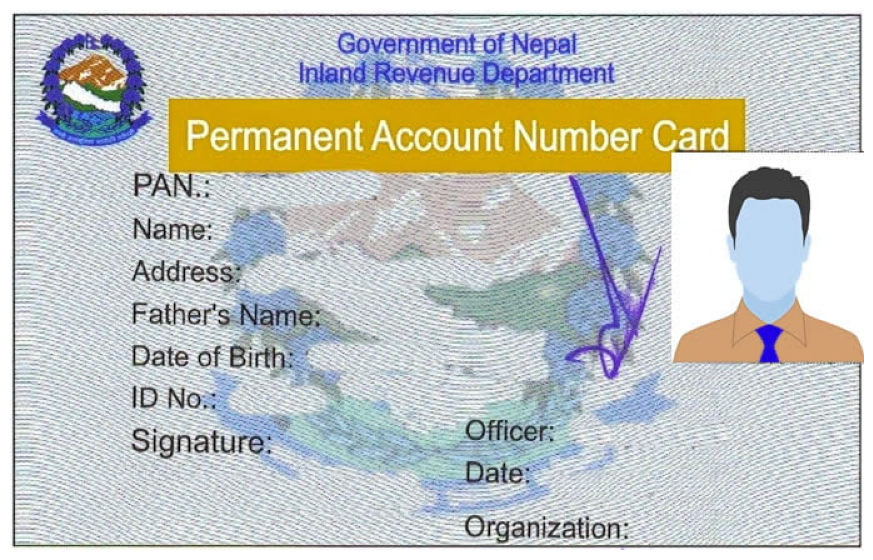

In [171]:
# show the document
display(image)

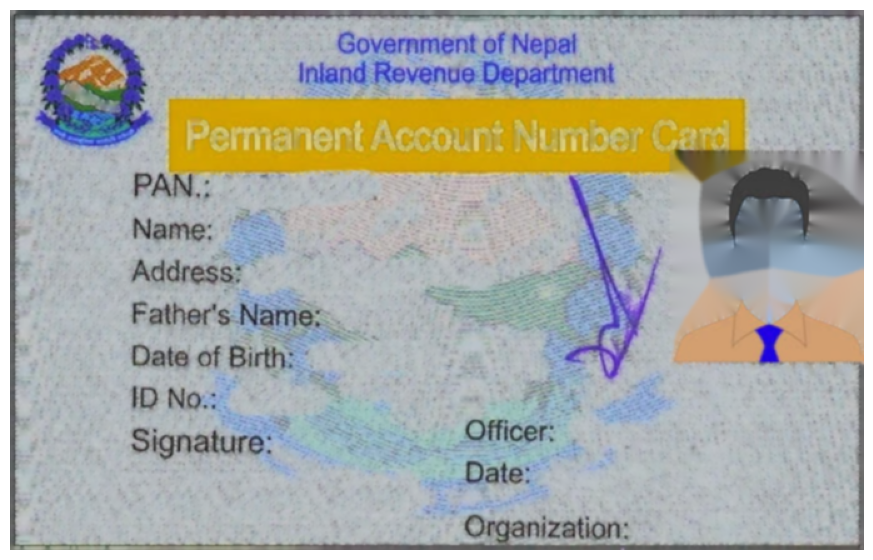

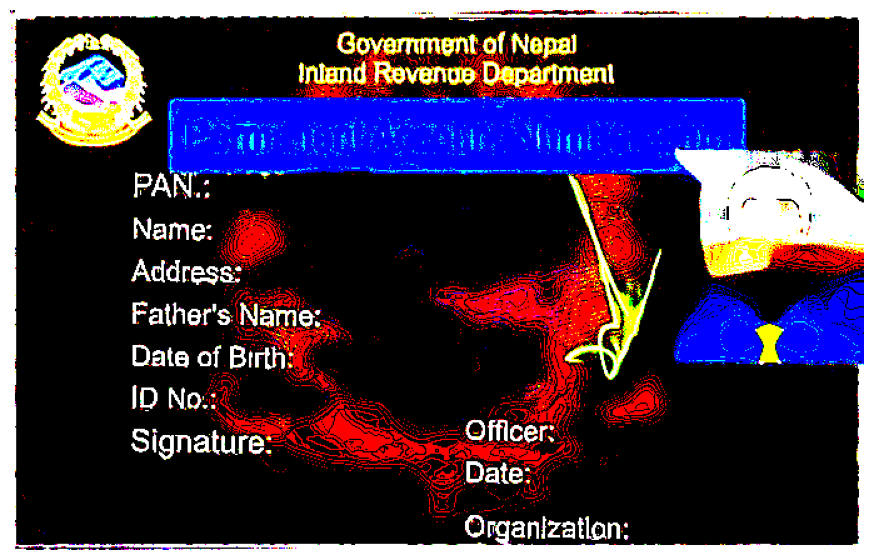

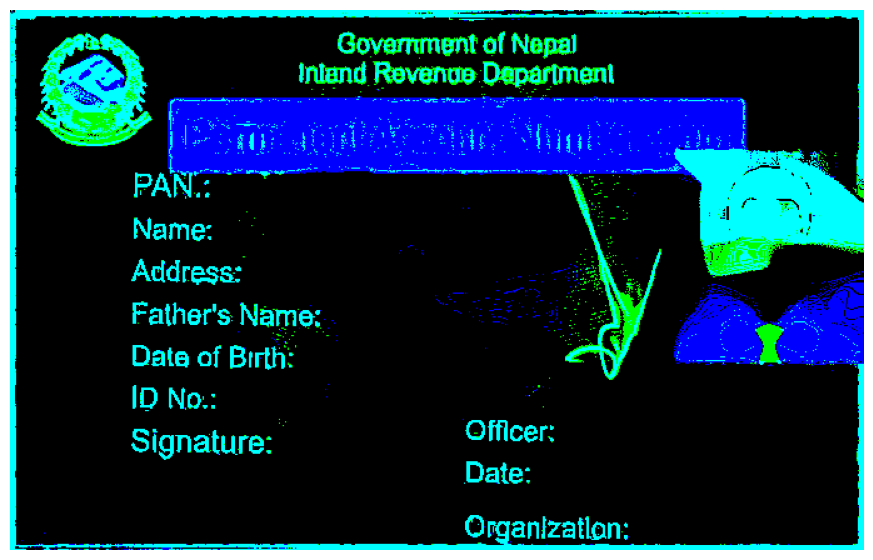

In [172]:
# Pre-Processing the image

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a binary mask where the watermark is white and the rest is black
_, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Use inpainting to remove the watermark
result = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Gaussian Blur for noise reduction
blurred_image = cv2.GaussianBlur(result, (3, 3), 0)
display(blurred_image)

# Alternatively, using fast Non-local Means Denoising
denoised_image = cv2.fastNlMeansDenoisingColored(blurred_image, None, 10, 10, 7, 21)

# Create a sharpening kernel
sharpen_kernel = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])

# Apply the sharpening kernel to the image
sharpened_image = cv2.filter2D(denoised_image, -1, sharpen_kernel)

# binary threshold for nehancing text
_, binary_image = cv2.threshold((sharpened_image),150,255,cv2.THRESH_BINARY_INV)
display(binary_image)

B, G, R = cv2.split(binary_image)
# Set the Red channel to zero
B[:] = 0
# Merge the channels back
image_processed = cv2.merge([B, G, R])

display(image_processed)

In [173]:
# Use Tesseract to extract text from the image
# Install Tesseract if not done yet and ensure pytesseract can find it
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Extract text from the image
text = pytesseract.image_to_string(image_processed)

# Print extracted text
print("Extracted Text:\n", text)

# You can now search the text for keywords like "Permanent Account Number" to identify the document type
if "Permanent Account Number" in text:
    print("Document type: PAN Card")
else:
    print("Document type: Unknown")

Extracted Text:
 Government of Nepal
inland Revenoe Department

PAN.:

Name:
Address:
Father's Name:
Date of Birth:
ID No::
Signature:

Officer:
Date:

Organizatlon:


Document type: Unknown
